# Sephora Products and Reviews  

### Submitted by: Group -  MCO1 7
- *ANIVERSARIO, Samantha Grace Salvador*
- *ARDALES, Darius Vincent Cirujales*
- *ROMERO, Ayiana Louise Garcia*

## Problem Statement
It is no secret that many beauty products are available in the market nowadays. Thus, shopping can be overwhelming for customers. For instance, Sephora, a major beauty retailer, has many products and user reviews, making it hard for customers to find what they want.

Given this, our project aims to build a recommender system for Sephora that makes use of user reviews and product details to offer personalized product suggestions -- making it easier for customers to discover products that they'll love, improve their shopping experiences, and helping them find what they are looking for.





## Dataset Information

To analyze Sephora’s products and reviews, we will use two datasets: the *Product Information Dataset* and the *Reviews Dataset*.

### Product Info Dataset
This dataset is contained in a `.csv` file which contains a detailed information about the various beauty products available on Sephora's online store.
1. `loves_count`: The number of 'loves' a product has received.
2. `rating`: Averate rating of the product.
3. `reviews`: Number of reviews for the product.
4. `size`: Size of the product.
5. `variation_type`: Type of variation for the product (e.g., size, color).
6. `variation_value`: Specific value for the variation.
7. `variation_desc`: Description of the product variation.
8. `ingredients`: Ingredients used in the product.
9. `price_usd`: Price of the product in USD.
10. `value_price_usd`: Value price of the product in USD.
11. `sale_price_usd`: Sale price of the product in USD.
12. `limited_edition`: Indicates if the product is a limited edition.
13. `new`: Indicates if the product is new.
14. `online_only`: Indicates if the product is available only online.
15. `out_of_stock`: Indicates if the product is out of stock.
16. `sephora_exclusive`: Indicates if the product is exclusive to Sephora.
17. `highlights`: Key highlights or features of the product.
18. `primary_category`: Primary category of the product.
19. `secondary_category`: Secondary category of the product.
20. `tertiary_category`: Tertiary category of the product.
21. `child_count`: Number of child products associated with the main product.
22. `child_max_price`: Maximum price of child products.
23. `child_min_price`: Minimum price of child products.

### Reviews Dataset
This dataset is also in a `.csv` file containing detailed information about the various beauty products available on Sephora's online store.

1. `author_id`: Unique identifier for the review author.
2. `rating`: Rating given by the user for the product.
3. `is_recommended`: Indicates whether the user recommends the product (binary: 0 or 1).
4. `helpfulness`: Helpfulness score of the review, reflecting its utility to other users.
5. `total_feedback_count`: Total number of feedback received for the review.
6. `total_neg_feedback_count`: Total number of negative feedbacks.
7. `total_pos_feedback_count`: Total number of positive feedbacks.
8. `submission_time`: Time when the review was submitted.
9. `review_text`: Text content of the review.
10. `review_title`: Title of the review.
11. `skin_tone`: Skin tone of the reviewer.
12. `eye_color`: Eye color of the reviewer.
13. `skin_type`: Skin type of the reviewer.
14. `hair_color`: Hair color of the reviewer.
15. `product_id`: Unique identifier for the product being reviewed.
16. `product_name`: Name of the product.
17. `brand_name`: Brand of the product.
18. `price_usd`: Price of the product in USD.

### Import Libraries


In [69]:
from concurrent.futures import ThreadPoolExecutor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

### Load Datasets
> Load the datasets to be used for this project such as the `product_info.csv` and the `reviews_x.csv`

> For faster read execution, the `ThreadPoolExecutor` is utilized for parallel processing and to load the files concurrently. 

In [70]:
csv_urls = [
    "https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/product_info.csv",
    "https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/reviews_0-250_part1.csv",
    "https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/reviews_0-250_part2.csv",
    "https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/reviews_0-250_part3.csv",
    "https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/reviews_250-500.csv",
    "https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/reviews_500-750.csv",
    "https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/reviews_750-1250.csv",
    "https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/reviews_1250-end.csv",
]

# Function to read a CSV file from a URL
def read_csv_from_url(url):
    return pd.read_csv(url)

with ThreadPoolExecutor() as executor:
    # Map the read_csv_from_url function to the list of URLs
    dataframes = list(executor.map(read_csv_from_url, csv_urls))

C:\Users\Ayiana\AppData\Local\Temp\ipykernel_14752\4174221684.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url)
C:\Users\Ayiana\AppData\Local\Temp\ipykernel_14752\4174221684.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url)
C:\Users\Ayiana\AppData\Local\Temp\ipykernel_14752\4174221684.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url)
C:\Users\Ayiana\AppData\Local\Temp\ipykernel_14752\4174221684.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url)
C:\Users\Ayiana\AppData\Local\Temp\ipykernel_14752\4174221684.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url)


### Store the data in their respective datasets

In [71]:
product_info, reviews_0_250_part1, reviews_0_250_part2, reviews_0_250_part3, reviews_250_500, reviews_500_750, reviews_750_1250, reviews_1250_end = dataframes

reviews_0_250 = pd.concat([reviews_0_250_part1, reviews_0_250_part2, reviews_0_250_part3])

### Concatenate Reviews Datasets into a Single DataFrame
> Since the reviews are spread across five (5) datasets, we should concatenate these datasets for easier access.

In [72]:
reviews = pd.concat([reviews_0_250, reviews_250_500, reviews_500_750, reviews_750_1250, reviews_1250_end])

## Exploratory Data Analysis (EDA)

> Let us now look at the datasets that we have

### Product Info Dataset

In [73]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [74]:
product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [75]:
product_info.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

### Reviews Dataset

In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982854 n

In [77]:
reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [78]:
duplicateReviews = reviews[reviews.duplicated(['review_text'], keep=False)]

reviews_count = reviews.groupby('product_id').size().reset_index(name='review_count')
print(reviews_count)

     product_id  review_count
0       P107306           253
1       P114902          1529
2        P12045          1687
3       P122651           200
4       P122661           810
...         ...           ...
2346     P94421          2914
2347     P94812           523
2348      P9939           272
2349      P9940           829
2350      P9941           391

[2351 rows x 2 columns]


### Validating Count of Reviews
- product_info has a column ('reviews') dictating the count of reviews per product_id
- validate these numbers with a group by

In [79]:
# Change file path if you want to see the outputs

# file_path = r"C:\Users\Sam\Desktop\DLSU\4th Year (3rd Sem)\DATA102\FINAL FINAL FINAL MCO\Output Files"
file_path = r"C:\Users\Ayiana\Documents\Academic\AY 23-24\DATA102\MCO Output Files"

In [80]:
# Copy the product_id and reviews column of the product_info df
prodInfo_reviewCount = product_info[['product_id', 'reviews']].copy()

# Rename the reveiews column
prodInfo_reviewCount.rename(columns={'reviews': 'review_count'}, inplace=True)

# For product_id's with no reviews, replace N/A with 0
prodInfo_reviewCount['review_count'].fillna(0, inplace=True)

prodInfo_reviewCount

,product_id,review_count
0,P473671,11.0
1,P473668,13.0
2,P473662,16.0
3,P473660,21.0
4,P473658,13.0
...,...,...
8489,P467659,7.0
8490,P500874,556.0
8491,P504428,2.0
8492,P504448,0.0


In [81]:
# In a new dataframe, count the number of times a product_id is reviewed in the reviews df
reviews_reviewCount = reviews['product_id'].value_counts().reset_index()

# Name the columns
reviews_reviewCount.columns = ['product_id', 'review_count2']

reviews_reviewCount

,product_id,review_count2
0,P420652,16138
1,P7880,8736
2,P218700,7763
3,P248407,7547
4,P269122,7414
...,...,...
2346,P501153,1
2347,P504424,1
2348,P480445,1
2349,P501886,1


In [82]:
# Merge the two previously created dataframes on product_id and only retain id's that are shared and on prodInfo_reviewCount
merged_reviewCounts = pd.merge(prodInfo_reviewCount, reviews_reviewCount, on='product_id', how='left')

# For product_id's with no reviews, replace N/A with 0
merged_reviewCounts['review_count2'].fillna(0, inplace=True)

# Create a new column that shows the difference between the count of reviews on the product_info df and the reviews df
merged_reviewCounts['review_count_diff'] = merged_reviewCounts['review_count'] - merged_reviewCounts['review_count2']

merged_reviewCounts


,product_id,review_count,review_count2,review_count_diff
0,P473671,11.0,0.0,11.0
1,P473668,13.0,0.0,13.0
2,P473662,16.0,0.0,16.0
3,P473660,21.0,0.0,21.0
4,P473658,13.0,0.0,13.0
...,...,...,...,...
8489,P467659,7.0,0.0,7.0
8490,P500874,556.0,0.0,556.0
8491,P504428,2.0,0.0,2.0
8492,P504448,0.0,0.0,0.0


In [83]:
mismatch_counter = 0
count_productIds = product_info.shape[0]

for diff in merged_reviewCounts['review_count_diff']:
    if diff != 0:
        mismatch_counter += 1

print(f"There are {mismatch_counter} product_id's with a mismatched count of reviews, out of {count_productIds} product_id's.")

There are 6648 product_id's with a mismatched count of reviews, out of 8494 product_id's.


When we compare the count of reviews stated on the product_info dataframe versus on the reviews dataframe, the counts are different. As more than **78% of the total count of product_id's do not match the count of reviews stated** in the product_info.reviews column, this is very confusing. A possible reason for this that the group thought of is because of **duplicate reviews for the same item** (e.g. a customer buying two of the same items and the same review being counted twice, for each product bought). 

### Removing of Duplicates

In [84]:
# Create a new dataframe and copy the reviews dataframe
cleaned_reviews = reviews.copy()

# Drop the first column ('Unnamed: 0') of reviews, which is acting as an index
cleaned_reviews.drop(columns='Unnamed: 0', inplace=True)

cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1094411 non-null  object 
 1   rating                    1094411 non-null  int64  
 2   is_recommended            926423 non-null   float64
 3   helpfulness               532819 non-null   float64
 4   total_feedback_count      1094411 non-null  int64  
 5   total_neg_feedback_count  1094411 non-null  int64  
 6   total_pos_feedback_count  1094411 non-null  int64  
 7   submission_time           1094411 non-null  object 
 8   review_text               1092967 non-null  object 
 9   review_title              783757 non-null   object 
 10  skin_tone                 923872 non-null   object 
 11  eye_color                 884783 non-null   object 
 12  skin_type                 982854 non-null   object 
 13  hair_color                867643 n

In [85]:
# Create a DF containing all the duplicates for better inspection

# duplicate_reviews = cleaned_reviews[cleaned_reviews.duplicated(subset=['author_id', 'product_id', 'submission_time', 'review_title', 'review_text'], keep=False)]
duplicate_reviews = cleaned_reviews[cleaned_reviews.duplicated(keep=False)]

# duplicate_reviews.to_csv(file_path + '\duplicate_reviews.csv')
duplicate_reviews[['author_id', 'submission_time', 'product_id', 'review_title', 'review_text']].head(10)

,author_id,submission_time,product_id,review_title,review_text
5338,1150759844,2020-06-26,P420652,NaN,I bought this after I tried a sample. It’s ver...
5339,1150759844,2020-06-26,P420652,NaN,I bought this after I tried a sample. It’s ver...
5476,1604550515,2020-06-15,P420652,Full Baby Lips,My lips are smooth & full! This feels wonderfu...
5477,1604550515,2020-06-15,P420652,Full Baby Lips,My lips are smooth & full! This feels wonderfu...
7241,2003943527,2020-02-20,P420652,The Softest lips!!,I love this lip mask! i use it twice a week an...
7242,2003943527,2020-02-20,P420652,The Softest lips!!,I love this lip mask! i use it twice a week an...
7243,1557672780,2020-02-20,P420652,More than a sleeping mask,THE BEST!! Makes my lips so smooth and soft. I...
7244,1557672780,2020-02-20,P420652,More than a sleeping mask,THE BEST!! Makes my lips so smooth and soft. I...
7910,12801717308,2019-12-19,P420652,Beauty Must Have!,This lip mask is incredible! Especially in the...
7911,12801717308,2019-12-19,P420652,Beauty Must Have!,This lip mask is incredible! Especially in the...


In [86]:
# Find duplicate rows, keep the first instance of the duplicate and drop the rest
cleaned_reviews.drop_duplicates(keep='first', inplace=True)

cleaned_reviews.head(10)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.00,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
5,42802569154,4,1.0,1.00,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
6,6941883808,2,0.0,0.25,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
7,27926227988,5,1.0,NaN,0,0,0,2023-03-19,I use this at night or while I’m putting makeu...,Works great,fairLight,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
8,7656791726,5,1.0,1.00,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
9,38727834382,5,1.0,1.00,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [87]:
# Perform the same processing and comparison as the 'preoduct_info' review count vs 'reviews' review count

# Count the number of times a product_id is reviewed in the reviews df
cleanedReviews_reviewCount = cleaned_reviews['product_id'].value_counts().reset_index()

# Rename the columns
cleanedReviews_reviewCount.columns = ['product_id', 'review_count3']

cleanedReviews_reviewCount

,product_id,review_count3
0,P420652,16126
1,P7880,8734
2,P218700,7762
3,P248407,7543
4,P269122,7413
...,...,...
2346,P501153,1
2347,P504424,1
2348,P480445,1
2349,P501886,1


In [88]:
# Merge the two previously created dataframes on product_id and only retain id's that are shared and on prodInfo_reviewCount
merged_cleanedReviewCounts = pd.merge(prodInfo_reviewCount, cleanedReviews_reviewCount, on='product_id', how='left')

# For product_id's with no reviews, replace N/A with 0
merged_cleanedReviewCounts['review_count3'].fillna(0, inplace=True)

# Create a new column that shows the difference between the count of reviews on the product_info df and the reviews df
merged_cleanedReviewCounts['review_count_diff'] = merged_cleanedReviewCounts['review_count'] - merged_cleanedReviewCounts['review_count3']

merged_cleanedReviewCounts
# merged_cleanedReviewCounts.to_csv(file_path + '\merged_cleanedReviewCounts.csv')


,product_id,review_count,review_count3,review_count_diff
0,P473671,11.0,0.0,11.0
1,P473668,13.0,0.0,13.0
2,P473662,16.0,0.0,16.0
3,P473660,21.0,0.0,21.0
4,P473658,13.0,0.0,13.0
...,...,...,...,...
8489,P467659,7.0,0.0,7.0
8490,P500874,556.0,0.0,556.0
8491,P504428,2.0,0.0,2.0
8492,P504448,0.0,0.0,0.0


In [89]:
mismatch_counter = 0
count_productIds = product_info.shape[0]


for diff in merged_cleanedReviewCounts['review_count_diff']:
    if diff != 0:
        mismatch_counter += 1

print(f"There are {mismatch_counter} product_id's with a mismatched count of reviews, out of {count_productIds} product_id's.")

There are 6679 product_id's with a mismatched count of reviews, out of 8494 product_id's.


In [90]:
# We further inspect rows with the SAME REVIEW, BUT DIFFERENT ITEMS
duplicate_reviews2 = cleaned_reviews[cleaned_reviews.duplicated(subset=['author_id', 'submission_time', 'review_title', 'review_text'], keep=False)]

# duplicate_reviews2.to_csv(file_path + '\duplicate_reviews2.csv')
duplicate_reviews2[['author_id', 'submission_time', 'review_title', 'review_text', 'product_id']].head(10)

,author_id,submission_time,review_title,review_text,product_id
877,22934451719,2022-08-05,NaN,MY FAVORITE LIP SLEEPING MASK. It feels so goo...,P420652
878,22934451719,2022-08-05,NaN,MY FAVORITE LIP SLEEPING MASK. It feels so goo...,P420652
2136,33914299569,2021-11-07,NaN,The Aquaphor healing ointment saves my dry cra...,P420652
2137,33914299569,2021-11-07,NaN,The Aquaphor healing ointment saves my dry cra...,P420652
3854,1786504204,2021-01-10,NaN,Have been using this (the same pot) for the la...,P420652
3855,1786504204,2021-01-10,NaN,Have been using this (the same pot) for the la...,P420652
4166,6782858790,2020-11-29,Smells too good!,I love this product when I put it on at night....,P420652
4167,6782858790,2020-11-29,Smells too good!,I love this product when I put it on at night....,P420652
4579,6083729409,2020-09-20,NaN,Love love love this stuff! It smells so fun an...,P420652
4580,6083729409,2020-09-20,NaN,Love love love this stuff! It smells so fun an...,P420652


As there are still rows with the same review_text but with different product_id's, we have to drop other instances of the same review. However, there is a **problem of identifying which product_id's were intentionally bought and which were potentially 'freebies'**. 

For example, these products have the same review_text:
- Green Clean Makeup Removing Cleansing Balm
- Green Clean Makeup Meltaway Cleansing Balm Limited Edition Jumbo

Take a look at this purchase, all with the same review_text:
- Mini Gentle Cleansing Oil Makeup Remover
- Anti-Aging First Care Activating Serum
- Mini First Care Activating Serum
- First Care Activating Serum 25th Anniversary Limited Edition
- Gentle Cleansing Oil Makeup Remover

*It becomes harder to identify which were for free, or maybe all of these were bought at regular price.*


Contrary to what the group believed, **after dropping duplicate reviews, it did not improve the rate of matches** for the count of reviews per product_id. In fact, the count of mismatches went up by 31. The group then assumes that the count stated in product_info.reviews column is **not reliable**. However, the counts will not affect the future processing made by the group, hence we will use the count produced by the group-by's made previously rather than the product_info.reviews column.

At this point, the dataset to be used for the list of reviews is **cleaned_reviews**.

### Product Reviews Charts

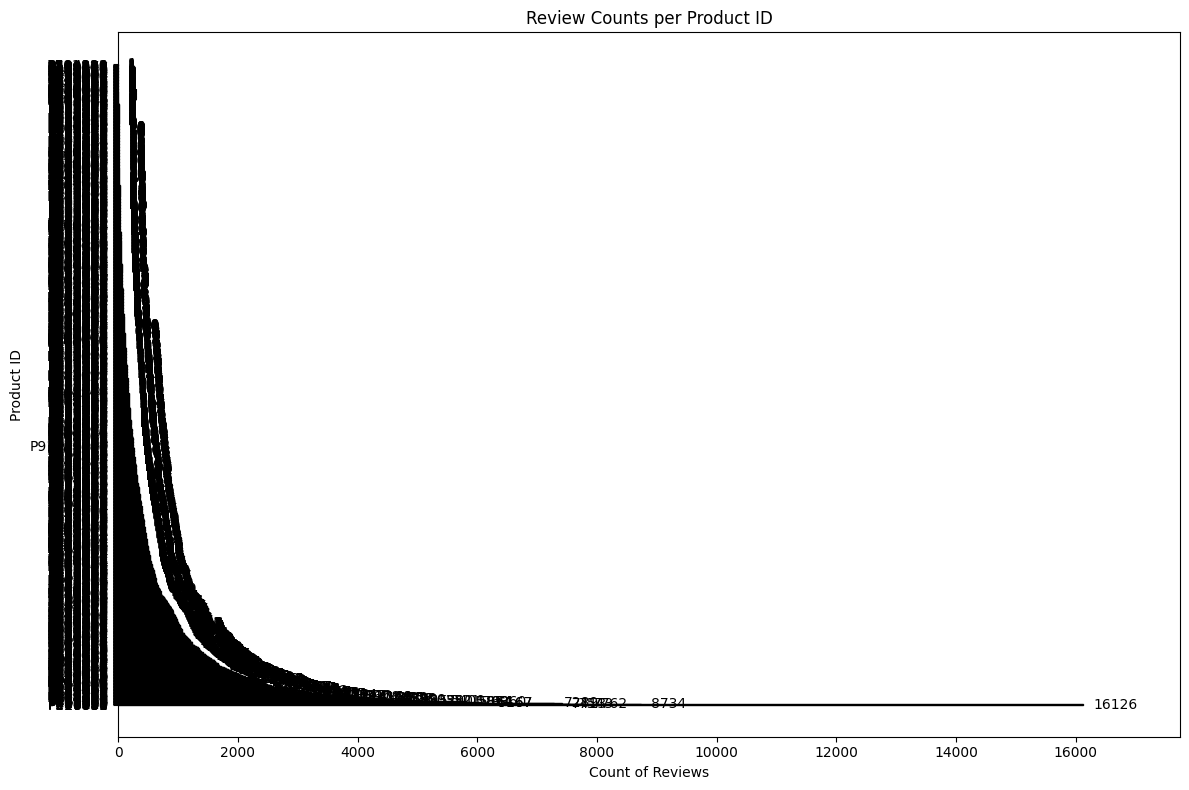

In [91]:
# Filter data to include only product_ids with review_count > 0
filtered_data = cleanedReviews_reviewCount[cleanedReviews_reviewCount['review_count3'] > 0]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Horizontal bar chart
bars = ax.barh(filtered_data['product_id'], filtered_data['review_count3'], color='skyblue', edgecolor='black')

# Customizing the appearance
ax.set_xlabel('Count of Reviews')
ax.set_ylabel('Product ID')
ax.set_title('Review Counts per Product ID')

# Set x-axis limit to make the chart appear nicer
max_review_count = filtered_data['review_count3'].max()
ax.set_xlim(0, max_review_count * 1.1)  # Adding some padding to the max value

# Add labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + max_review_count * 0.01, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

Due to the volume of product_id's and the drastic difference between the counts of reviews, it is difficult to visualize the count of reviews by product_id. Instead, we should try to visualize the review counts by brand and by date

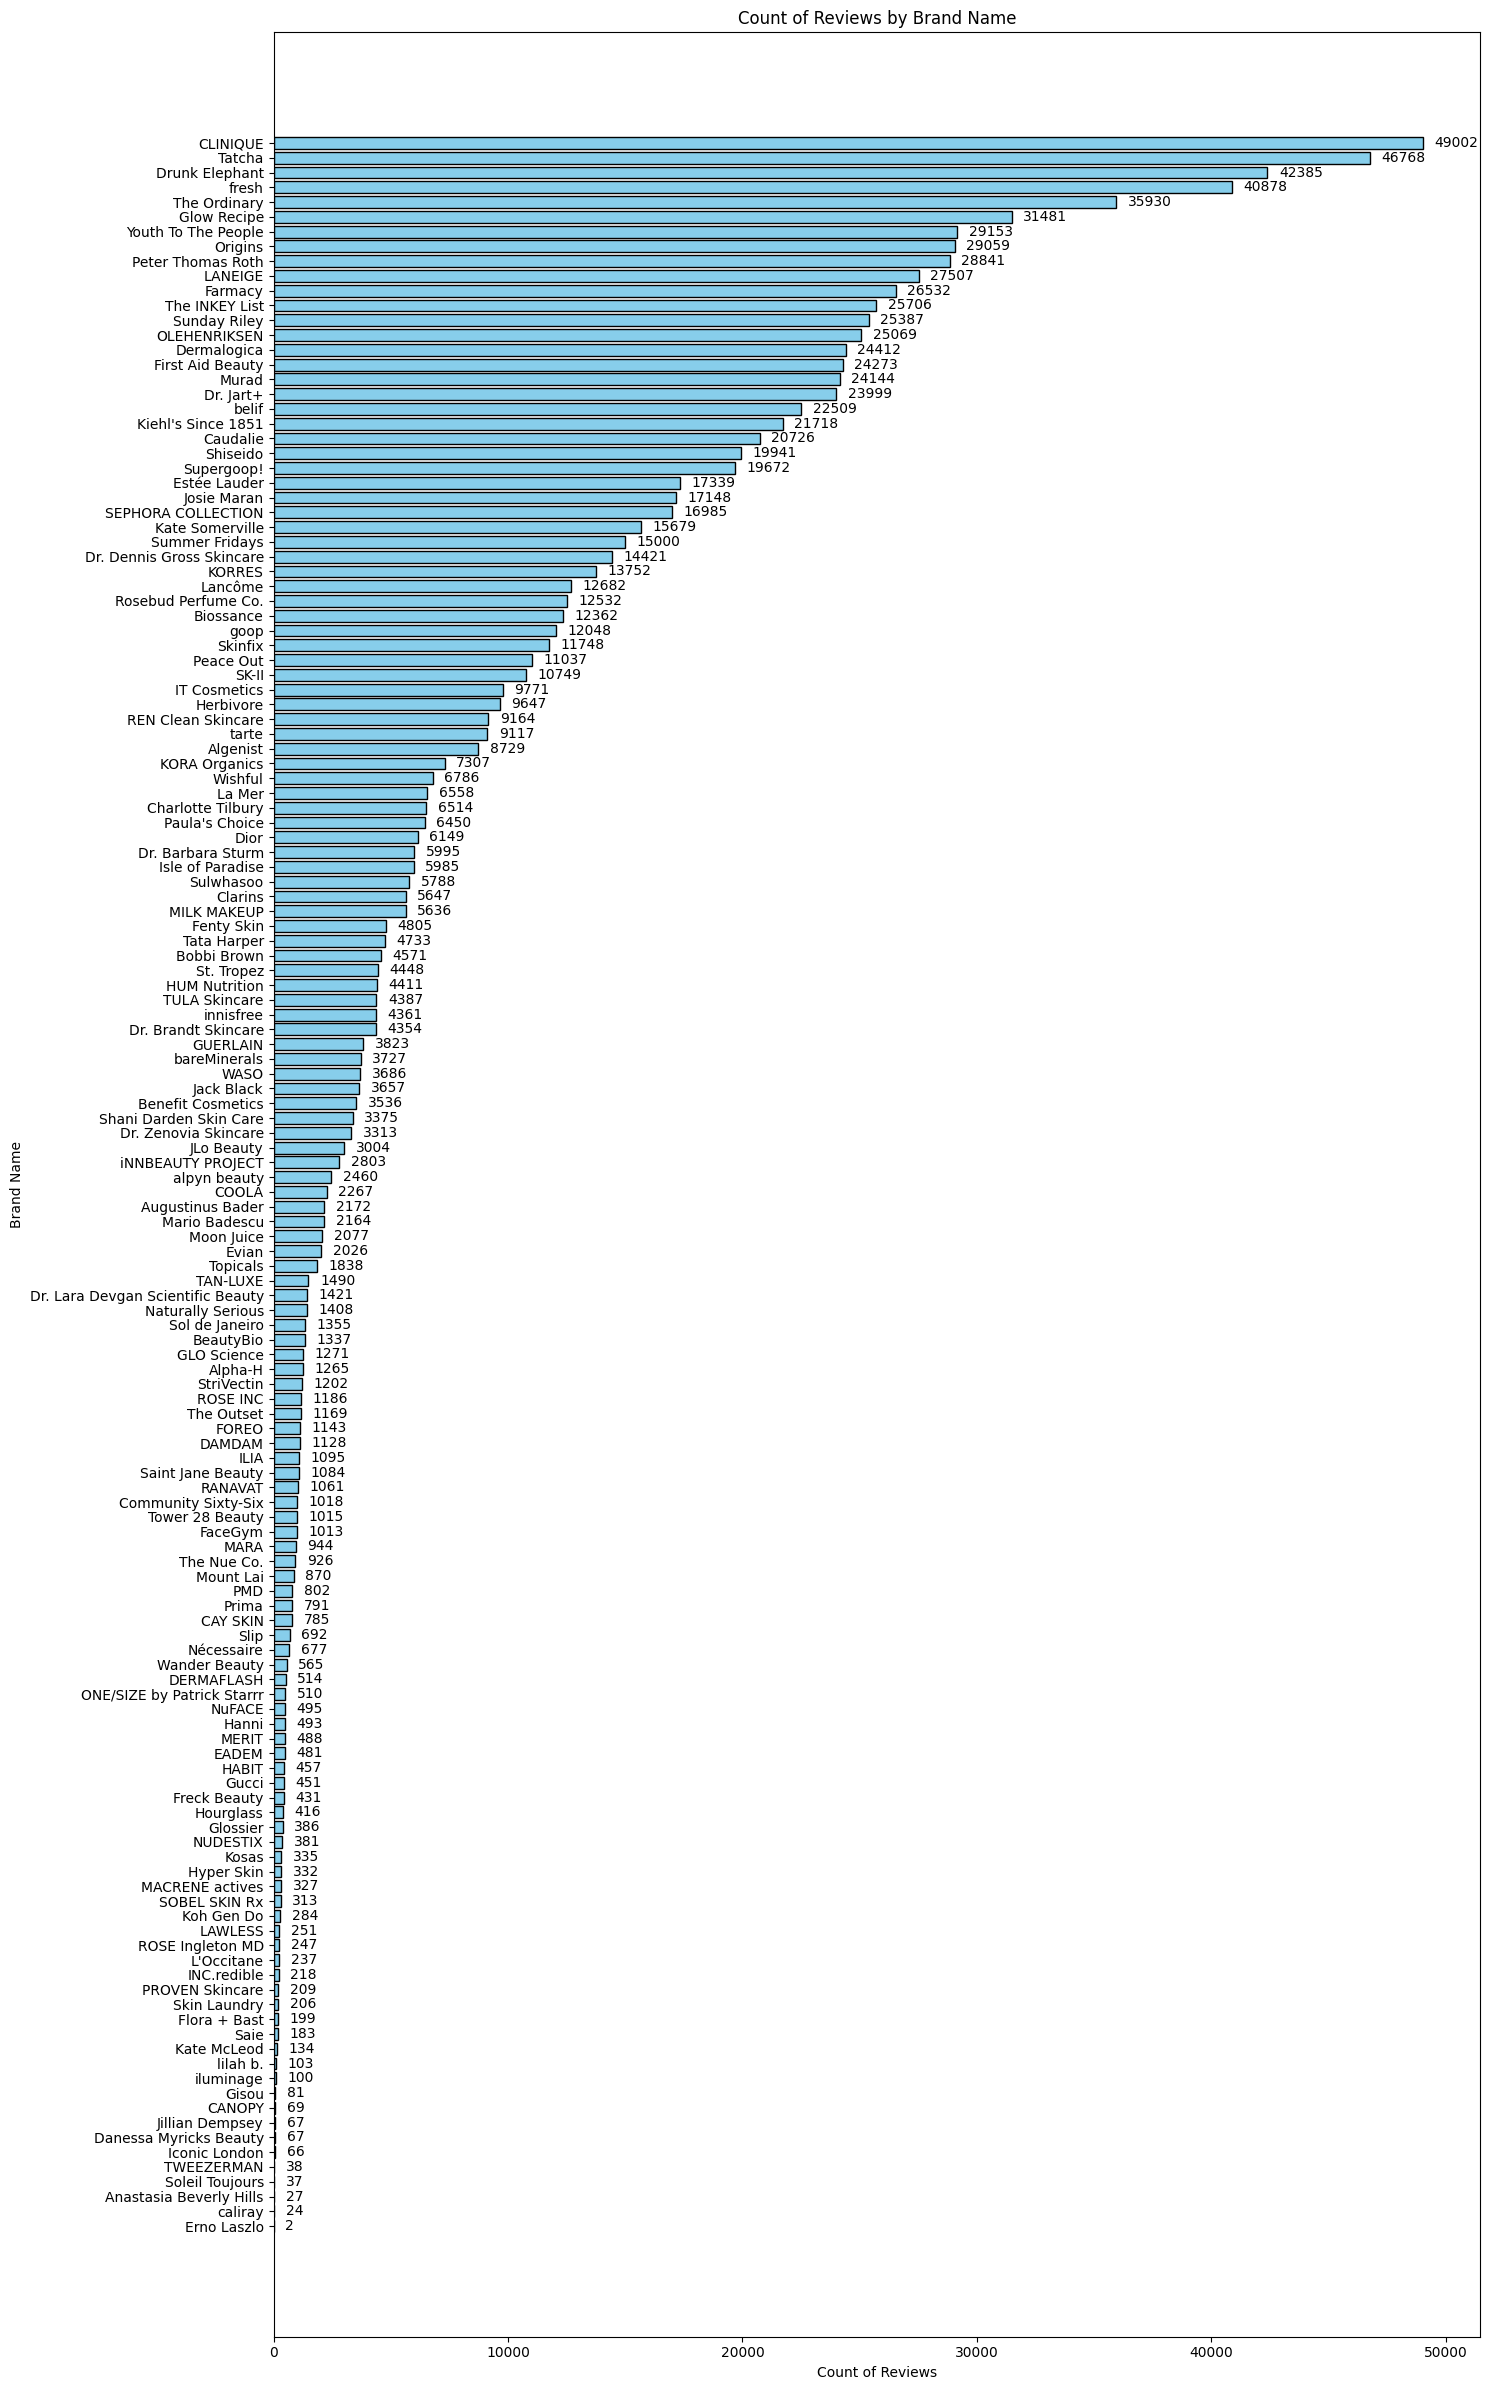

In [92]:
# Group by brand_name and count the reviews
brand_reviews_count = cleaned_reviews.groupby('brand_name').size().reset_index(name='review_count')

# Sort by review_count in ascending order for better visualization
brand_reviews_count = brand_reviews_count.sort_values(by='review_count', ascending=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 24))

# Horizontal bar chart
bars = ax.barh(brand_reviews_count['brand_name'], brand_reviews_count['review_count'], color='skyblue', edgecolor='black')

# Customizing the appearance
ax.set_xlabel('Count of Reviews')
ax.set_ylabel('Brand Name')
ax.set_title('Count of Reviews by Brand Name')

# Add labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + max(brand_reviews_count['review_count']) * 0.01, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


Based on the Count of Reviews by Brand Name Chart, from 2008 to 2023, the **brand with the most reviews is CLINIQUE, with 49,002 reviews**. We can then infer that CLINIQUE is the most popular (in terms of sales) brand of Sephora. The next most popular brands are, in order: Tatcha (with 46,768 reviews), Drunk Elephant (with 42,385 reviews), fresh (with 40,878 reviews), and The Ordinary (with 35,930 reviews).

In [93]:
# cleaned_reviews['submission_time'] = pd.to_datetime(cleaned_reviews['submission_time'], errors='coerce')


In [94]:
# print(cleaned_reviews['submission_time'].isna().sum())


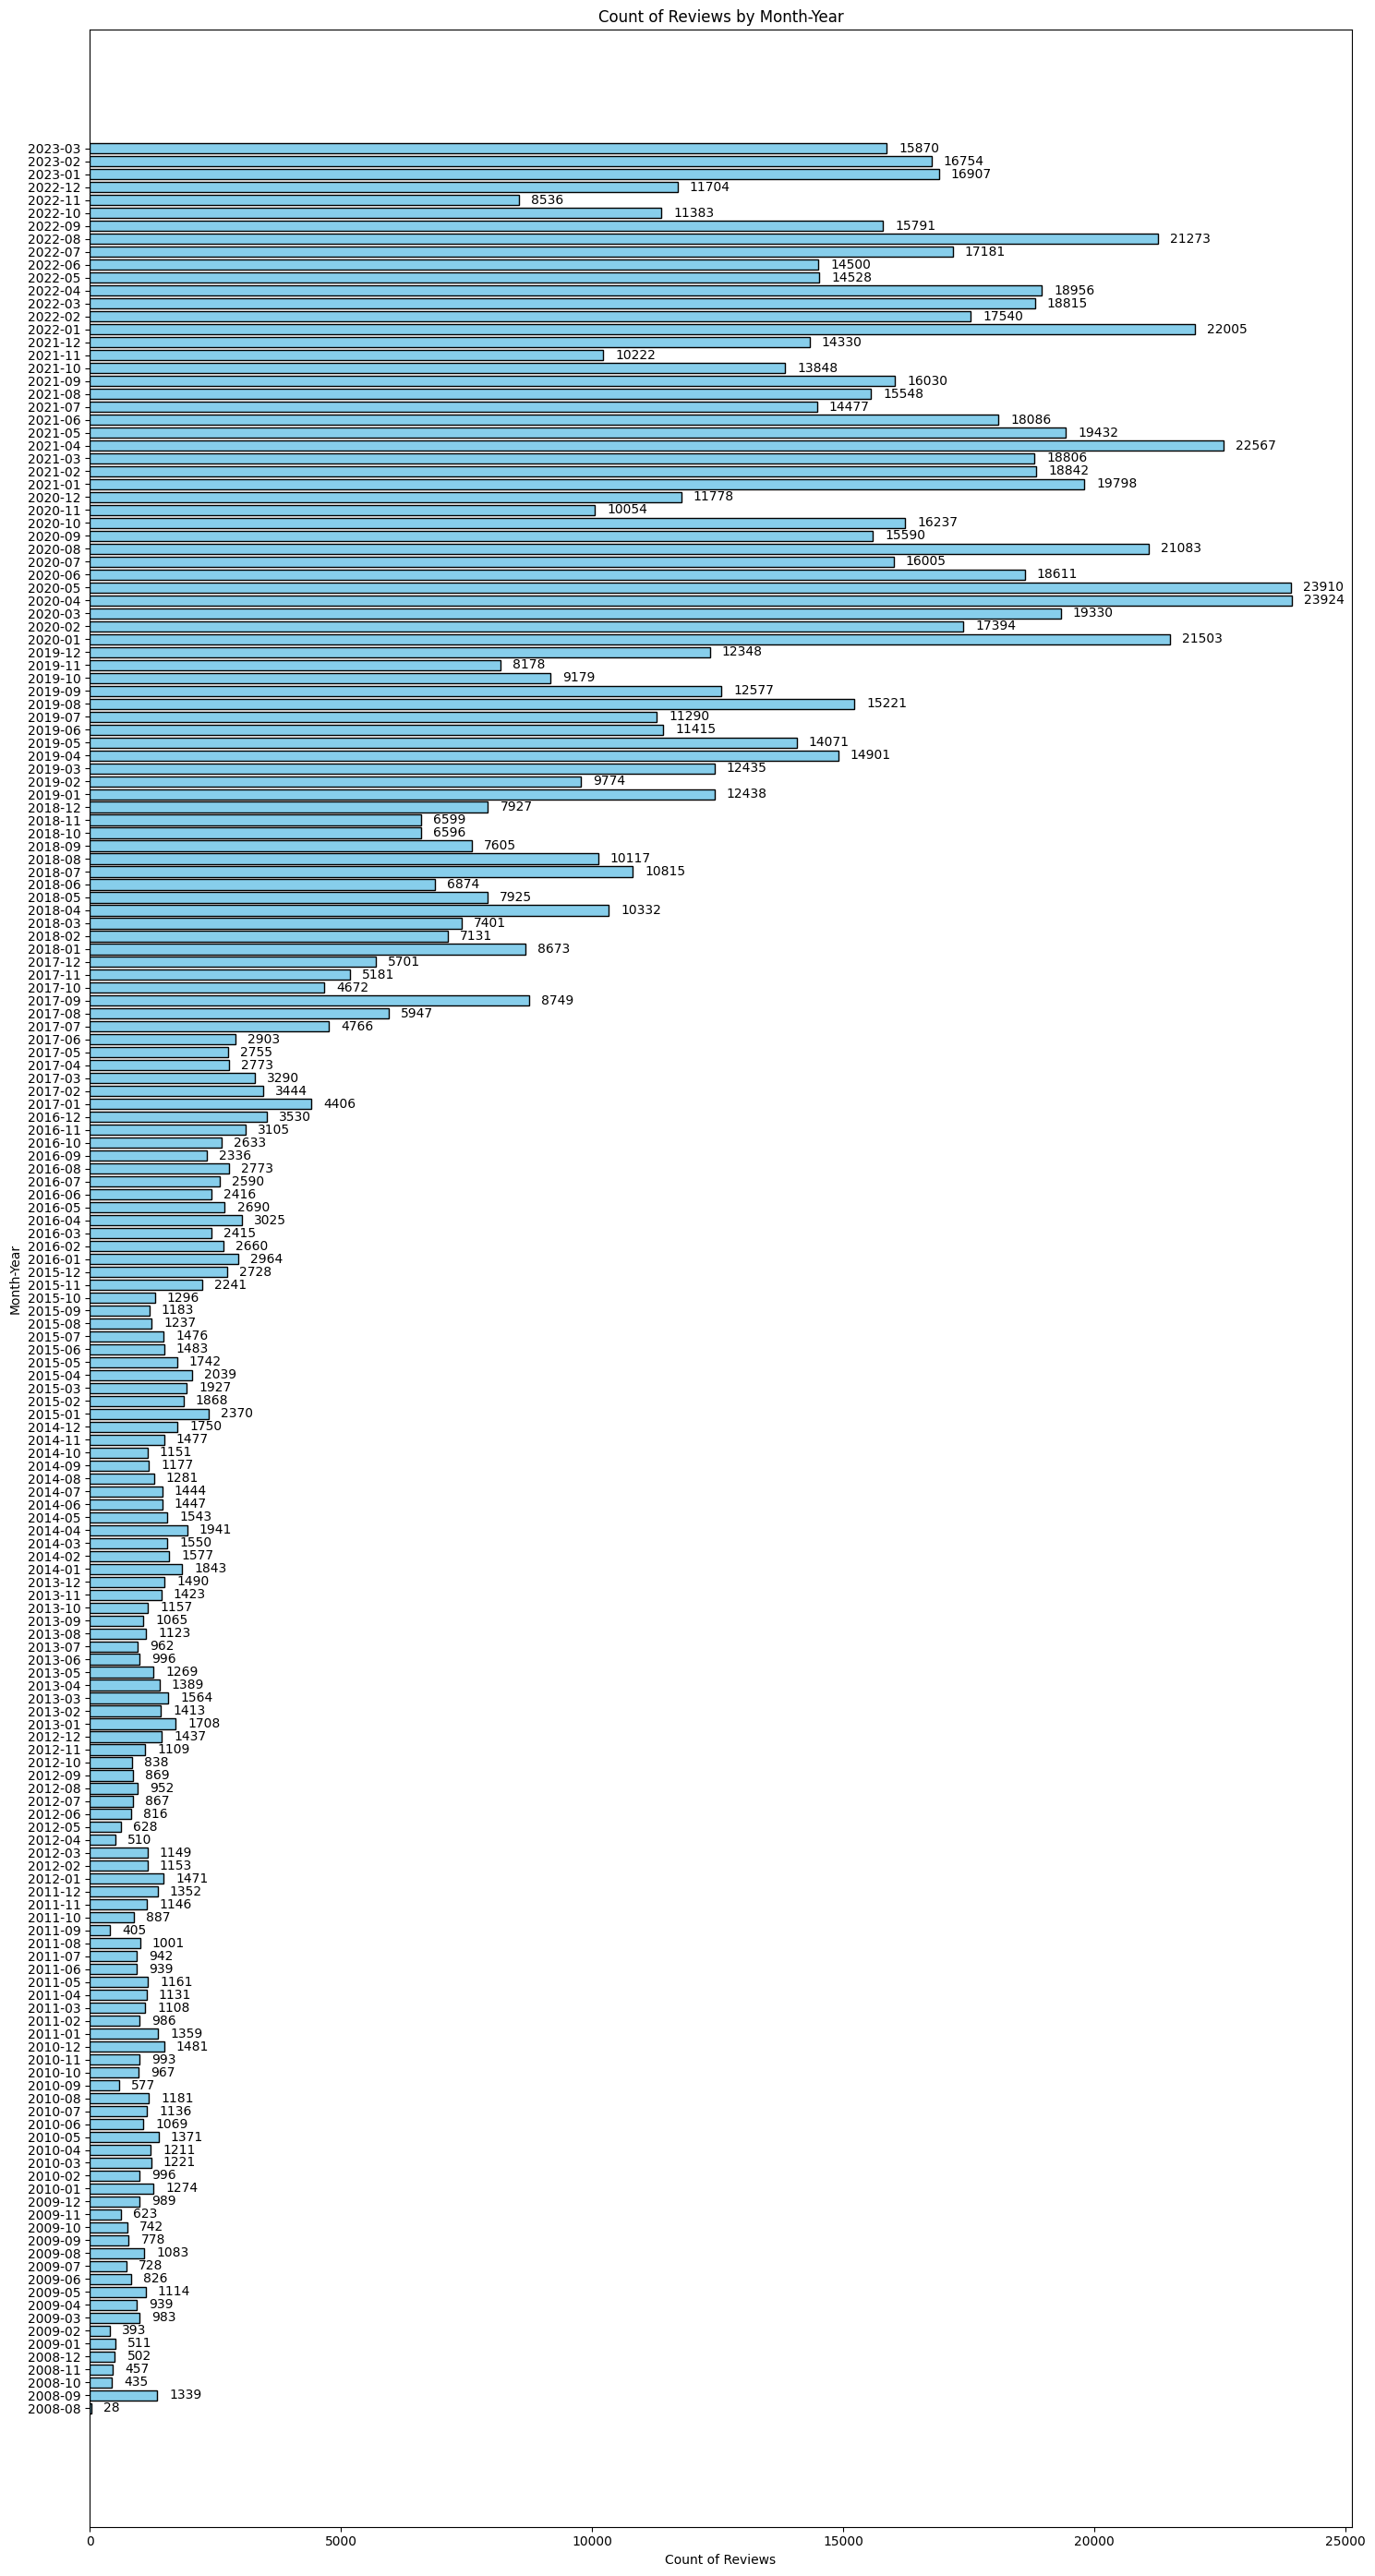

In [96]:
# Extract month-year and create a new column
cleaned_reviews['submission_time'] = pd.to_datetime(cleaned_reviews['submission_time'])

cleaned_reviews['month_year'] = cleaned_reviews['submission_time'].dt.to_period('M')

# Group by month-year and count the reviews
month_year_reviews_count = cleaned_reviews.groupby('month_year').size().reset_index(name='review_count')

# Sort by month-year for better visualization
month_year_reviews_count = month_year_reviews_count.sort_values(by='month_year')

# Convert month-year back to string for plotting
month_year_reviews_count['month_year'] = month_year_reviews_count['month_year'].astype(str)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 28))

# Horizontal bar chart
bars = ax.barh(month_year_reviews_count['month_year'], month_year_reviews_count['review_count'], color='skyblue', edgecolor='black')

# Customizing the appearance
ax.set_xlabel('Count of Reviews')
ax.set_ylabel('Month-Year')
ax.set_title('Count of Reviews by Month-Year')

# Add labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + max(month_year_reviews_count['review_count']) * 0.01, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

Let us sort the dates by the most number of reviews to leeast number of reviews for better visualization.

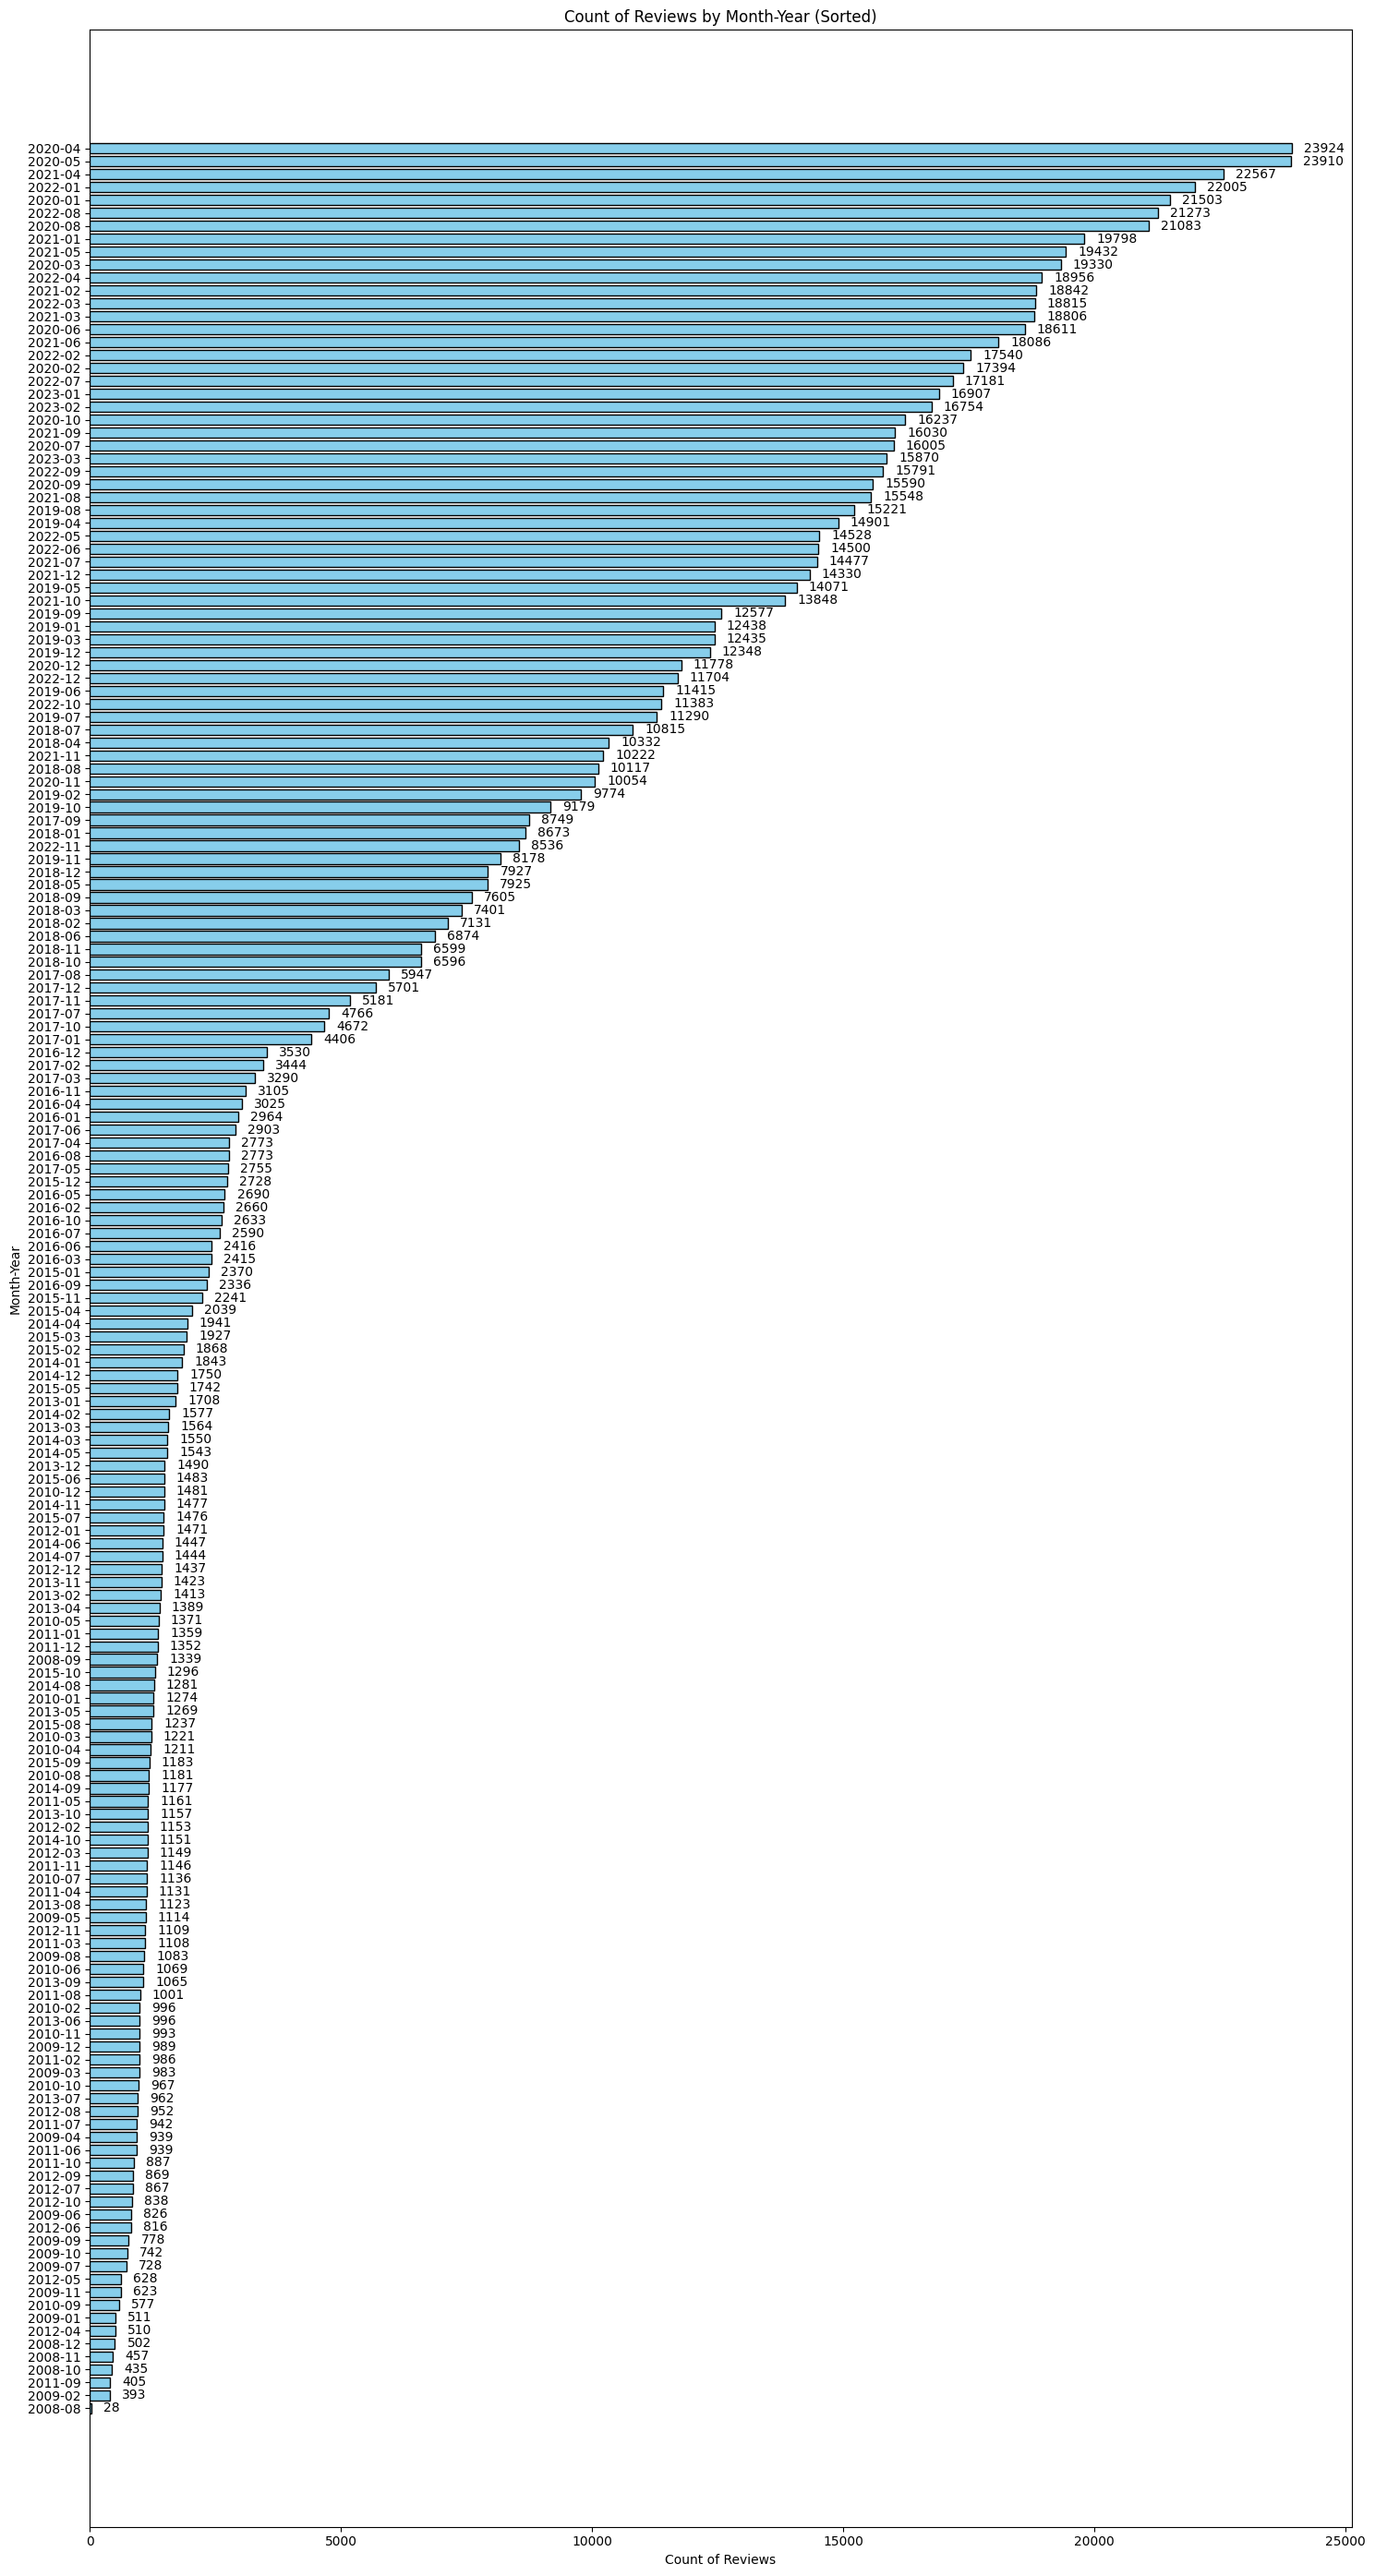

In [97]:
# Extract month-year and create a new column
cleaned_reviews['month_year'] = cleaned_reviews['submission_time'].dt.to_period('M')

# Group by month-year and count the reviews
month_year_reviews_count = cleaned_reviews.groupby('month_year').size().reset_index(name='review_count')

# Sort by month-year for better visualization
month_year_reviews_count = month_year_reviews_count.sort_values(by='review_count', ascending=True)

# Convert month-year back to string for plotting
month_year_reviews_count['month_year'] = month_year_reviews_count['month_year'].astype(str)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 28))

# Horizontal bar chart
bars = ax.barh(month_year_reviews_count['month_year'], month_year_reviews_count['review_count'], color='skyblue', edgecolor='black')

# Customizing the appearance
ax.set_xlabel('Count of Reviews')
ax.set_ylabel('Month-Year')
ax.set_title('Count of Reviews by Month-Year (Sorted)')

# Add labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + max(month_year_reviews_count['review_count']) * 0.01, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

Based on the Count of Reviews by Month-Year Chart, from 2008 to 2023, **April 2020 is the month-year with the most number of reviews, with a count of 23,924**. With everyone indoors and online due to the COVID-19 pandemic, we can infer that Sephora garnered a lot of reviews for this period as many Sephora users was anticipating that year's Beauty Insider Spring Savings Event, which was held on April 17 to 27. The month-years with the next highest number of reviews are: May 2020 (with 23,910 reviews), April 2021 (with 22,567 reviews), January 2020 (with 22,005 reviews), and January 2022 (with 21,503 reviews).

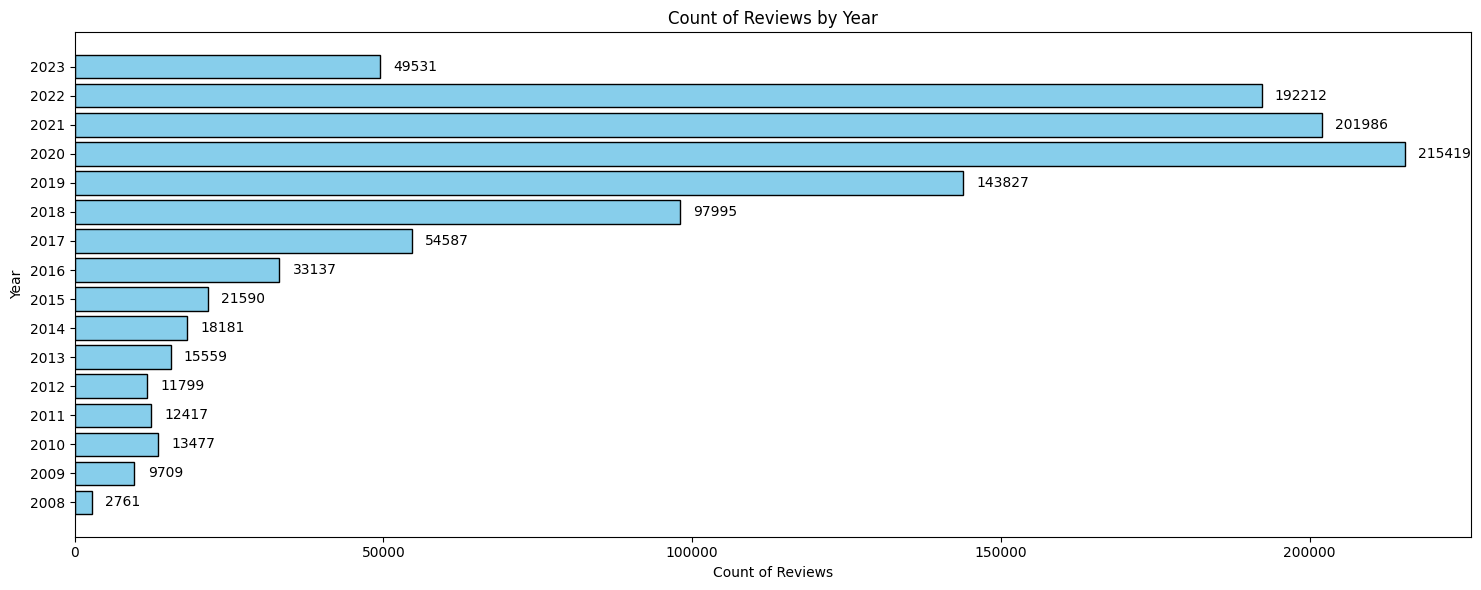

In [98]:
# Extract year and create a new column
cleaned_reviews['year'] = cleaned_reviews['submission_time'].dt.year

# Group by year and count the reviews
year_reviews_count = cleaned_reviews.groupby('year').size().reset_index(name='review_count')

# Sort by year for better visualization
year_reviews_count = year_reviews_count.sort_values(by='year')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Horizontal bar chart
bars = ax.barh(year_reviews_count['year'].astype(str), year_reviews_count['review_count'], color='skyblue', edgecolor='black')

# Customizing the appearance
ax.set_xlabel('Count of Reviews')
ax.set_ylabel('Year')
ax.set_title('Count of Reviews by Year')

# Add labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + max(year_reviews_count['review_count']) * 0.01, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


Based on the Count of Reviews by Year Chart, **from 2008 to 2020, the number of product reviews has a generally linear growth**. The number of product reviews **peaked on 2020, with a count fo 215,419 reviews**. The **succeeding years have a gradual decline**: 2021 with 201,986 reviews, 2022 with 192,212 reviews, and 2023 with 49,531. However, it is to be noted that the data for 2023 is limited to only until March, hence the count presented is not a reflection of the actual number of reviews on Sephora for that year. 

In [108]:
# Import packages
import dash
from dash import Dash, html, dcc, Output, Input
import pandas as pd
import plotly.graph_objects as go

In [ ]:
cleaned_reviews['month'] = cleaned_reviews['submission_time'].dt.month

In [135]:
# Initialize the app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.Label("Brand Name:", style={'fontSize':20, 'textAlign':'center'}),
    dcc.Dropdown(
        id = 'brandName-dpdn',
        options = [{'label': prod, 'value': prod} for prod in sorted(cleaned_reviews['brand_name'].unique())],
        value = [],
        multi = True,
        clearable = False
    ),

    html.Br(),

    html.Label("Year:", style={'fontSize':20, 'textAlign':'center'}),
    dcc.Dropdown(
        id = 'year-dpdn',
        options = [{'label': pay, 'value': pay} for pay in sorted(cleaned_reviews['year'].unique())],
        value = [],
        multi = True,
        clearable = False
    ),
    
    dcc.Graph(id='display-graph', figure={})
])

# Populate initial values on 'Brand Name' dropdown
@app.callback(
        Output('brandName-dpdn', 'value'),
        Input('brandName-dpdn', 'options')
)
def set_brandName_value(available_brands):
    return [x['value'] for x in available_brands]

# Populate initial values on 'Year' dropdown
@app.callback(
        Output('year-dpdn', 'value'),
        Input('year-dpdn', 'options')
)
def set_yearType_value(year):
    return [x['value'] for x in year]

@app.callback(
        Output('display-graph', 'figure'),
        Input('brandName-dpdn', 'value'),
        Input('year-dpdn', 'value')
)
def update_graph(selected_brand, selected_year):
    if not selected_brand or not selected_year:
        return Dash.no_update
    else:
        # Filter the data based on the selected brand and year
        dff = cleaned_reviews[(cleaned_reviews['brand_name'].isin(selected_brand)) & 
                              (cleaned_reviews['year'].isin(selected_year))]

        # Group the filtered data by brand name and year, then count the reviews
        dff_grouped = dff.groupby(['brand_name']).size().reset_index(name='review_count')

        # Create the figure
        fig = go.Figure([go.Scatter(y=dff_grouped['brand_name'],
                                    x=dff_grouped['review_count'],
                                    mode='lines+markers',  # Adjust the mode as needed
                                    line=dict(color='forestgreen', width=2))])

        # Update the layout
        fig.update_layout(
            title={
                'text': "Review Count by Brand Name and Year",
                'x': 0.5,
                'xanchor': 'center',
                'font': {'family': 'Arial', 'size': 30, 'color': 'forestgreen'}
            },
            xaxis_title={
                'text': "Review Count",
                'font': {'family': 'Arial'}
            },
            yaxis_title={
                'text': "Brand Name",
                'font': {'family': 'Arial'}
            },
            width=1200,  # Set the desired width in pixels
            height=2000,  # Set the desired height in pixels
        )

        return fig
    
# Run the app
if __name__ == '__main__':
    app.run(debug=True,port=8080)

## Recommender Systems

#### Content-Based Filtering

##### Build Item Profile Matrix

Load the Dataset

In [ ]:
product_url ="https://raw.githubusercontent.com/riu-rd/files/main/datasets/sephora/product_info.csv"
product_info = pd.read_csv(product_url) 

In [ ]:
product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


Preprocessing of Data

In [ ]:
# fill the missing values seen earlier from the EDA
product_info['highlights'] = product_info['highlights'].fillna('')
product_info['primary_category'] = product_info['primary_category'].fillna('')
product_info['secondary_category'] = product_info['secondary_category'].fillna('')
product_info['tertiary_category'] = product_info['tertiary_category'].fillna('')

# combine into a single column for content-based filtering
product_info['combined_features'] = product_info.apply(lambda row: ' '.join([row['product_name'], row['brand_name'], row['highlights'], row['primary_category'], row['secondary_category'], row['tertiary_category']]), axis=1)

# check the new column 'combined_features'
product_info[['product_name', 'brand_name', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'combined_features']].head()

,product_name,brand_name,highlights,primary_category,secondary_category,tertiary_category,combined_features
0,Fragrance Discovery Set,19-69,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,Fragrance Discovery Set 19-69 ['Unisex/ Gender...
1,La Habana Eau de Parfum,19-69,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,La Habana Eau de Parfum 19-69 ['Unisex/ Gender...
2,Rainbow Bar Eau de Parfum,19-69,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,Rainbow Bar Eau de Parfum 19-69 ['Unisex/ Gend...
3,Kasbah Eau de Parfum,19-69,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,Kasbah Eau de Parfum 19-69 ['Unisex/ Genderles...
4,Purple Haze Eau de Parfum,19-69,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,Purple Haze Eau de Parfum 19-69 ['Unisex/ Gend...


Text Vectorization


This step converts text data into numerical format which allows ML algorithms to process and analyze it. In our case, using TF-IDF will transform the combined product information into feature vectors. Use this article to understand TF-IDF: https://yannawut.medium.com/basic-content-based-recommendation-system-with-python-code-be920b412067.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(product_info['combined_features'])

In [ ]:
# print the shape fo the tfidf_matrix
tfidf_matrix.shape

(8494, 4443)

The shape of the tfidf_matrix is 8494 rows and 4443 columns.

- Rows (8494): This indicates the number of products in our dataset, where each row represents a unique product.

- Columns (4443): This represents the number of significant terms or words identified after removing stop words. Stop words are commonly used words that do not contribute much meaning to the analysis, such as "and," "the," or "of." By excluding these, the model focuses on the more meaningful terms that are critical for distinguishing between products.

***Stop words***
These are the unimportant words that are eliminated to allow the model to focus on the important words instead.

##### Compute User Profile

In [ ]:
# identify items that the user has interactd with. in this case, the first two products will be used
user_interacted_products = ['Fragrance Discovery Set', 'La Habana Eau de Parfum']

# get the tfidf vectors from these two items
user_interacted_vectors = tfidf_matrix[product_info['product_name'].isin(user_interacted_products)]


In [ ]:
user_profile = user_interacted_vectors.mean(axis=0)
user_profile_dense = user_profile.A.flatten()
user_profile_dense = pd.Series(user_profile_dense).fillna(0)
user_profile_dense

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4438    0.0
4439    0.0
4440    0.0
4441    0.0
4442    0.0
Length: 4443, dtype: float64

Let's now examine the top and bottom features of our dataset, along with their corresponding scores

Since TF-IDF produces numerical outputs, we need to map these numbers to their corresponding feature names for better understanding. Let's extract the feature names from the TF-IDF vectorizer to achieve this.

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_scores = pd.DataFrame({
    'feature': feature_names,
    'score': user_profile_dense
})

feature_scores = feature_scores.sort_values(by='score', ascending=False)

Here are the top features. They represent the terms tat are mostly strongly associated with the products that the user has interacted with. From this, we can seee which products are relevant to the user.

In [ ]:
top_features = feature_scores.head()
top_features

,feature,score
3451,scent,0.313808
1669,gift,0.272194
3513,sets,0.265009
1183,discovery,0.230719
1590,fragrance,0.204867


In [ ]:
bottom_features = feature_scores.tail()
bottom_features

,feature,score
1489,figurare,0.0
1490,file,0.0
1491,filler,0.0
1492,filles,0.0
4442,éternité,0.0


##### Retreive Similar Items

Compute Similarity by using `cosine_similarity` between the user profile and all items in the TF-IDF matrix

In [ ]:
df_scores_rated = product_info[['product_name']].copy()
df_scores_rated['similarity'] = cosine_similarity(tfidf_matrix, user_profile_dense.values.reshape(1, -1)).flatten()
df_scores_sorted = df_scores_rated.sort_values('similarity', ascending=False)


In [ ]:
df_scores_filtered = df_scores_sorted[~df_scores_sorted['product_name'].isin(user_interacted_products)]
top_recommendations = df_scores_filtered.head(10)  # display top 10 recommendations
top_recommendations

,product_name,similarity
1818,Discovery Set,0.785093
3954,Discovery Sampler Set,0.769652
1606,Discovery Set,0.755461
7557,Peace Perfume Discovery Set,0.729939
7578,Peace Perfume Discovery Set,0.724844
3204,Mini Jardin Fragrance Discovery Set,0.713939
5795,Discovery Set,0.711728
3974,Travel Spray Trio Set,0.711616
1035,The Shebang Gift Set,0.679288
6973,Eau De Parfum Discovery Set,0.675461


#### Collabortaive Filtering with SVD

##### Build Item-User Matrix

Load Data


In [ ]:
data = {
    'author_id': ['1741593524', '31423088263', '5061282401', '6083038851', '47056667835',
                  '1741593524', '5061282401', '31423088263', '6083038851', '47056667835'],
    'rating': [5.0, 1.0, 5.0, 5.0, 5.0, 2.0, 3.0, 4.0, 2.0, 5.0],
    'product_id': ['P504322', 'P420652', 'P420652', 'P420652', 'P420652',
                   'P420652', 'P504322', 'P420652', 'P504322', 'P504322']
}

df = pd.DataFrame(data)

print("Initial DataFrame:")
df.head()

Initial DataFrame:


,author_id,rating,product_id
0,1741593524,5.0,P504322
1,31423088263,1.0,P420652
2,5061282401,5.0,P420652
3,6083038851,5.0,P420652
4,47056667835,5.0,P420652


Aggregate Ratings

We aggregate ratings by product and author to ensure each product-author pair has a unique rating.

In [ ]:
df_aggregated = df.groupby(['product_id', 'author_id'], as_index=False).agg({'rating': 'mean'})
print("\nAggregated DataFrame:")
df_aggregated



Aggregated DataFrame:


,product_id,author_id,rating
0,P420652,1741593524,2.0
1,P420652,31423088263,2.5
2,P420652,47056667835,5.0
3,P420652,5061282401,5.0
4,P420652,6083038851,5.0
5,P504322,1741593524,5.0
6,P504322,47056667835,5.0
7,P504322,5061282401,3.0
8,P504322,6083038851,2.0


Create the Item-User Matrix
> In this step, we also have filled the missing values with zeros initially

In [ ]:
item_user_matrix = df_aggregated.pivot(index='product_id', columns='author_id', values='rating').fillna(0)
item_user_matrix


author_id,1741593524,31423088263,47056667835,5061282401,6083038851
product_id,,,,,
P420652,2.0,2.5,5.0,5.0,5.0
P504322,5.0,0.0,5.0,3.0,2.0


Pre-processing: Mean Amputation
> To handle missing values, we replace zeros with the average rating of each product. This ensures that no ratings are missing when we apply SVD.

In [ ]:
item_user_matrix_filled = item_user_matrix.apply(lambda x: x.replace(0, x[x > 0].mean()), axis=1)
item_user_matrix_filled.head()

author_id,1741593524,31423088263,47056667835,5061282401,6083038851
product_id,,,,,
P420652,2.0,2.50,5.0,5.0,5.0
P504322,5.0,3.75,5.0,3.0,2.0


##### Singular Value Decomposition

We decompose the item-user matrix into three matrices (u, s, vh) and then reconstruct it using only a specified number of factors. This reduced matrix helps us find latent relationships between products and users.



In [ ]:
u, s, vh = np.linalg.svd(item_user_matrix_filled, full_matrices=False)
factors = 2 


reconstructed_matrix = np.dot(u[:, :factors], np.dot(np.diag(s[:factors]), vh[:factors, :]))
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=item_user_matrix_filled.index, columns=item_user_matrix_filled.columns)

print("\nReconstructed Matrix:")
print(reconstructed_df.head())



Reconstructed Matrix:
author_id   1741593524  31423088263  47056667835  5061282401  6083038851
product_id                                                              
P420652            2.0         2.50          5.0         5.0         5.0
P504322            5.0         3.75          5.0         3.0         2.0


##### Evaluate the Model

We evaluate the performance of the reconstructed matrix by comparing the predicted ratings to the actual ratings, calculating RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error).



In [ ]:
train_ratings = item_user_matrix.reset_index().melt(id_vars=['product_id'])
train_ratings.rename({'value':'actual'}, inplace=True, axis=1)
train_ratings['pred'] = reconstructed_df.T.stack().values

rmse_train = mean_squared_error(train_ratings['actual'], train_ratings['pred'], squared=False)
mae_train = mean_absolute_error(train_ratings['actual'], train_ratings['pred'])

print(f'\nTrain Set RMSE: {rmse_train}')
print(f'Train Set MAE: {mae_train}')



Train Set RMSE: 1.1858541225631418
Train Set MAE: 0.3750000000000017


##### Recommend Products

We define a function to recommend the top products for a specific user based on their predicted ratings

In [ ]:
def recommend_products(user_id, reconstructed_df, top_n=5):
    if user_id not in reconstructed_df.columns:
        raise ValueError(f"User ID {user_id} not found in the matrix columns.")
    user_ratings = reconstructed_df[user_id]
    recommendations = user_ratings.sort_values(ascending=False)
    top_recommendations = recommendations.head(top_n)
    return top_recommendations

In [ ]:
user_id = '1741593524'
top_n = 5
recommendations = recommend_products(user_id, reconstructed_df, top_n)
print(f"\nTop {top_n} recommendations for user {user_id}:")
print(recommendations)



Top 5 recommendations for user 1741593524:
product_id
P504322    5.0
P420652    2.0
Name: 1741593524, dtype: float64


After applying Singular Value Decomposition (SVD) for collaborative filtering, we have generated a list of recommended products for a specific user.

For `author_id=1741593524`, the top 5 recommended products are as follows:

- Product ID `P504322`: This product has been rated with a score of 5.0. This high score suggests that this user is highly likely to enjoy this product.

- Product ID `P420652`: This product has been rated with a score of 2.0. This lower score indicates that this user might not find this product as appealing compared to others.

In summary, the recommendation system suggests that `author_id=1741593524` would find`P504322` the most enjoyable based on their past ratings and the patterns identified by the SVD method.

**Notes:**

As you can see, only 2 products were shown even though the system was set to recommend the top 5 products. This result highlights a limitation in our current approach.

*We have:*
- **Encountered Memory Issues:** When attempting to use the full dataset, we encountered memory errors due to the large size of the data. This made it impractical to process the entire dataset with the SVD algorithm.

- **Opted for a Smaller Dataset:** To address these memory issues, we decided to use a smaller subset of the dataset for our recommender system. While this smaller dataset allows us to run the SVD algorithm without running into memory errors, it also limits the number of recommendations the system can generate.

In this case, the recommender system has successfully identified 2 top products based on the reduced dataset. For more comprehensive results, we would need to address the memory constraints or find ways to optimize the processing of larger datasets.




## Logistic Regression
#### Based on a set of features, how likely will an item be recommended?

In [ ]:
lr_df = cleaned_reviews
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094187 entries, 0 to 49976
Data columns (total 20 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1094187 non-null  object        
 1   rating                    1094187 non-null  int64         
 2   is_recommended            926314 non-null   float64       
 3   helpfulness               532721 non-null   float64       
 4   total_feedback_count      1094187 non-null  int64         
 5   total_neg_feedback_count  1094187 non-null  int64         
 6   total_pos_feedback_count  1094187 non-null  int64         
 7   submission_time           1094187 non-null  datetime64[ns]
 8   review_text               1092743 non-null  object        
 9   review_title              783562 non-null   object        
 10  skin_tone                 923759 non-null   object        
 11  eye_color                 884677 non-null   object       

In our case, the most likely features that we will use for Logistic Regression in determining how likely will an item be recommended by a user are the **numeric features**. Therefore, these features will be cleaned and preprocessed before use.

#### Check for null values for the numeric features

In [ ]:
lr_df.isnull().sum()

author_id                        0
rating                           0
is_recommended              167873
helpfulness                 561466
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310625
skin_tone                   170428
eye_color                   209510
skin_type                   111449
hair_color                  226649
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
month_year                       0
year                             0
dtype: int64

##### Drop all rows that do not have an `is_recommended` value since it will not be useful for training. This will not affect the model accuracy much since it is around 1/10 of the data.

In [ ]:
lr_df.dropna(subset=['is_recommended'], inplace=True)

#### Then, we determine if we will impute the missing values for each feature using mean or median.

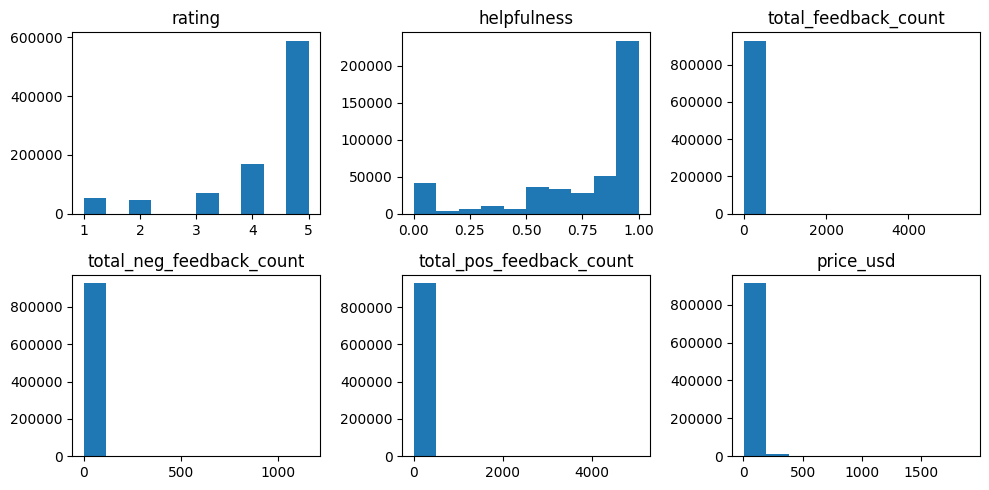

In [ ]:
columns = ['rating', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

for ax, column in zip(axes.flatten(), columns):
    ax.hist(lr_df[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

Since there is no normally distributed data, it seems that using median imputation for all features is the correct choice.

In [ ]:
lr_df['rating'] = lr_df['rating'].fillna(lr_df['rating'].median())
lr_df['helpfulness'] = lr_df['helpfulness'].fillna(lr_df['helpfulness'].median())
lr_df['total_feedback_count'] = lr_df['total_feedback_count'].fillna(lr_df['total_feedback_count'].median())
lr_df['total_neg_feedback_count'] = lr_df['total_neg_feedback_count'].fillna(lr_df['total_neg_feedback_count'].median())
lr_df['total_pos_feedback_count'] = lr_df['total_pos_feedback_count'].fillna(lr_df['total_pos_feedback_count'].median())
lr_df['price_usd'] = lr_df['price_usd'].fillna(lr_df['price_usd'].median())

lr_df.isnull().sum()

author_id                        0
rating                           0
is_recommended                   0
helpfulness                      0
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                290572
skin_tone                    40477
eye_color                    42309
skin_type                    19067
hair_color                   58776
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
month_year                       0
year                             0
dtype: int64

Getting the numeric features to prepare for determining **Feature Importance**

In [ ]:
features = ['rating', 'helpfulness', 'total_feedback_count',
            'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd'
           ]
X = lr_df[features]
y = lr_df['is_recommended']

Scale the values to reduce the impact of outliers, and ensure that the data is on the same scale.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Get the Feature Importance using Logistic Regression's `L2` penalty or `Ridge` and `L1` penalty or `Lasso`

In [ ]:
# For Ridge
# ridge = Ridge()
ridge = LogisticRegression(penalty='l2')
ridge.fit(X_scaled, y)
ridge_coef = ridge.coef_[0]

# For Lasso
# lasso = Lasso()
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X_scaled, y)
lasso_coef = lasso.coef_[0]

Visualize the Feature Importance for the Numeric Features

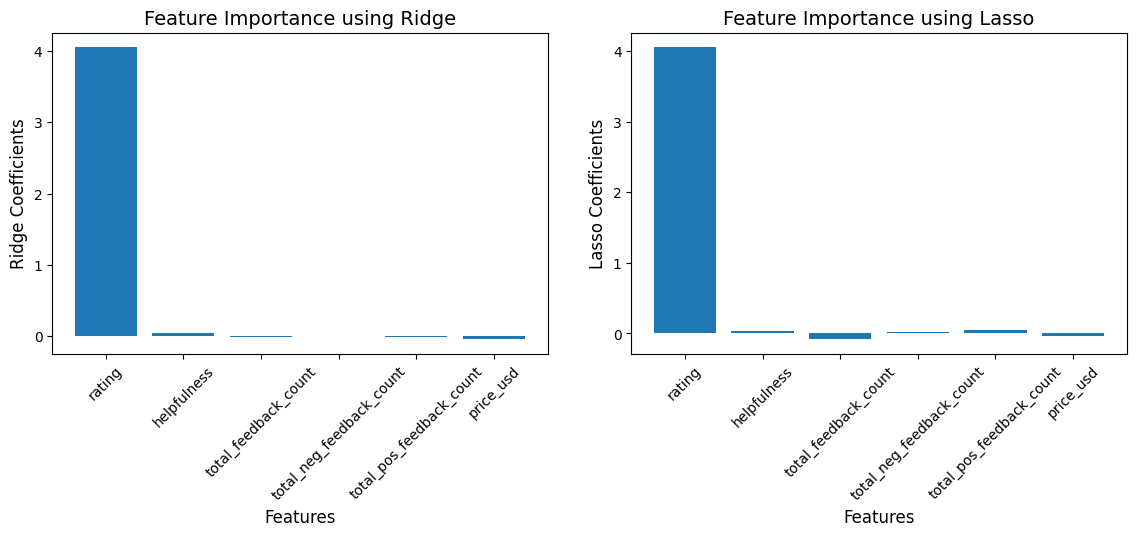

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].bar(features, ridge_coef)
axes[0].set_title('Feature Importance using Ridge', fontsize=14)
axes[0].set_xlabel('Features', fontsize=12)
axes[0].set_ylabel('Ridge Coefficients', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)

axes[1].bar(features, lasso_coef)
axes[1].set_title('Feature Importance using Lasso', fontsize=14)
axes[1].set_xlabel('Features', fontsize=12)
axes[1].set_ylabel('Lasso Coefficients', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout(pad=3.0)
plt.show()

#### Create the Logistic Regression Model Pipeline

In [ ]:
# Use the important features
features = ['rating', 'helpfulness', 'total_pos_feedback_count', 'price_usd']
X = lr_df[features]
y = lr_df['is_recommended']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
parameters = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]})

Get the best hyperparameters and use the best estimator chosen by `GridSearchCV` as the final model

In [ ]:
# Best hyperparameters
best_params = grid_search.best_params_

# Get the best model
lr_model = grid_search.best_estimator_

# Get the coefficients of the logistic regression model
coefficients = lr_model.named_steps['classifier'].coef_[0]

# Create a DataFrame to display coefficients with feature names
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

print("Best Hyperparameters:", best_params)
print("Coefficients of the Model: ")
print(coef_df)

Best Hyperparameters: {'classifier__C': 0.01}
Coefficients of the Model: 
                    Feature  Coefficient
0                    rating     3.979395
1               helpfulness     0.038879
2  total_pos_feedback_count    -0.021544
3                 price_usd    -0.035325


#### Evaluate the Model

In [ ]:
# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy_train = lr_model.score(X_train, y_train)
accuracy_test = lr_model.score(X_test, y_test)
print("Train Accuracy: ", accuracy_train)
print("Test Accuracy: ", accuracy_test)
print("")
print("------ Classification Report ------")
print(classification_report(y_test, y_pred))

Train Accuracy:  0.9631793223408376
Test Accuracy:  0.9628959911045378

------ Classification Report ------
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89     29493
         1.0       0.99      0.96      0.98    155770

    accuracy                           0.96    185263
   macro avg       0.91      0.96      0.93    185263
weighted avg       0.97      0.96      0.96    185263



#### Use the model to make predictions if a product is likely to be recommended given its `rating`, `helpfulness`, `total_pos_feedback_count`, and `price in USD`

In [ ]:
# Function that tells if an item is likely to be recommended given a set of parameters
def isRecommended(rating: int, helpfulness: float, total_pos_feedback_count: int, price_usd: int) -> str:
    sample_df = pd.DataFrame([[rating, helpfulness, total_pos_feedback_count, price_usd]], columns=features)
    prediction = lr_model.predict(sample_df)
    return "Recommended" if prediction[0] else "Not recommended"

In [ ]:
print("------ Model Usage ------")
# Using test values
prediction = isRecommended(4, 0.8, 10, 25)
print(prediction)

------ Model Usage ------
Recommended
